### Завдання.
Побудуйте класифікатор на основі дерева ухвалення рішень, використовуючи датасет ірісів Фішера – тренувальний набір ознак по трьох видах ірісів.


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

##### Загрузка даних

In [50]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris['feature_names']
target_names = iris['target_names']
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Побудова моделі дерева прийняття рішень

In [235]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)

##### Класифікація за допомогою моделі, оцінка її якості

In [236]:
y_pred = clf_model.predict(X_test)

In [237]:
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)*100:.2f}%')

Accuracy: 100.00%


##### Побудова дерева прийнятя рішень

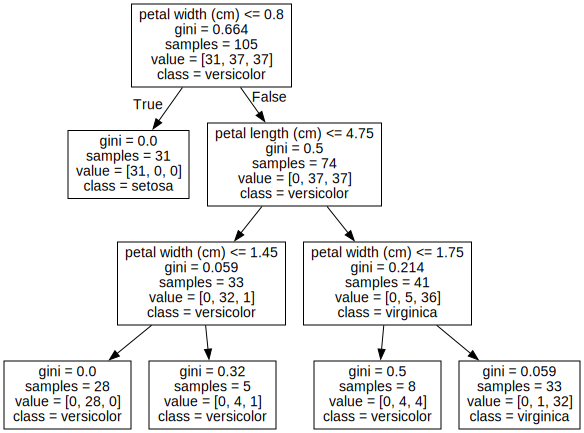

In [238]:
dot_data = tree.export_graphviz(clf_model, feature_names=feature_names, class_names=target_names)
graph = graphviz.Source(dot_data)
graph


In [239]:
importance = clf_model.feature_importances_
importance

array([0.        , 0.        , 0.42229245, 0.57770755])

In [240]:
sorted_imoptance = pd.DataFrame({'feature': feature_names, 'importance': importance}).sort_values('importance', ascending=False)
sorted_imoptance

,feature,importance
3,petal width (cm),0.577708
2,petal length (cm),0.422292
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000


#### Побудована модель з точністю 100% класифікує іриси за допомогою двох ознакак: petal width (ширина пелюстки) і petal length (довжина пелюстки). Дві інших ознаки sepal length і sepal width не є суттєвими для класифікації ірисів.